In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
iris = datasets.load_iris()

In [8]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [9]:
X = iris['data']
Y = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

#note: you can also get access to the elements by dot (.) access operator, e.g.,
# X = iris.data

print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)
print(feature_names)
print(target_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


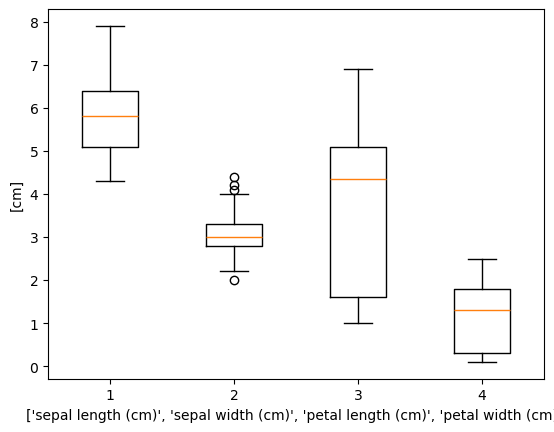

In [10]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

In [11]:
# Plot the scatter plot showing the first feature of the data set as X, and the second feature of the data set as Y 
# X[rows, columns]
# All rows, all columns
# X[:, :]

# X[All rows, 1st column], X[All rows, 2nd column]
# Sepal lengths of all flowers, Sepal widths of all flowers
print(X[:,0])
print("-----")
print(X[:,1]) 

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
-----
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7

Text(0, 0.5, 'sepal width (cm)')

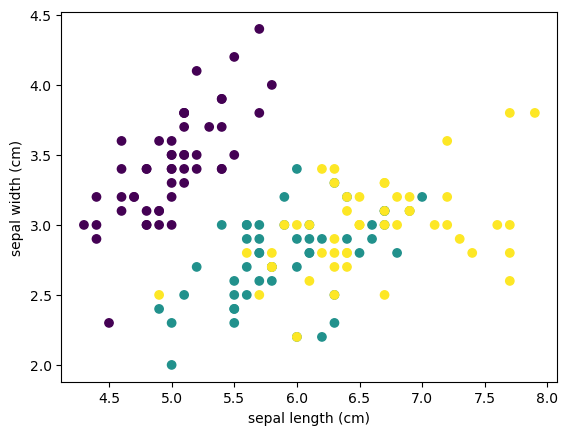

In [12]:
# A scatter plot of x (horizontal axis), y (vertical axis) with varying marker size and/or color.
# Note that these axis on the graph are not our typical division of X=Features Y=Answers that 
# will use for training and testing. This is only for plotting the dimensions of our features to see
# it with the human eye, and realize that KNeighborsClassifier will be useful here based on "clumping"
# matplotlib.pyplot.scatter(X=horizontal_axis, Y=vertical_axis, c=None)
plt.scatter(X[:,0], X[:,1], c=Y)
# Label the X and Y axis with Feature 1 name and Feature 1 name. 
plt.xlabel(feature_names[0]) 
plt.ylabel(feature_names[1]) 

In [13]:
# Put the code into a function so that we can re-use it
def plot_pair(X1, X2, x1_label , x2_label, Y):
    plt.show()
    plt.scatter(X1, X2, c=Y) 
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)

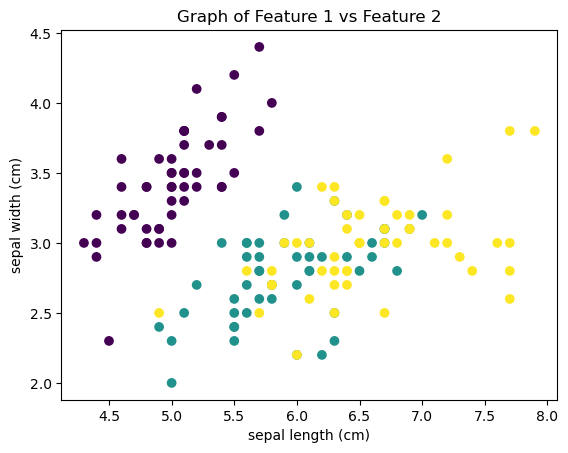

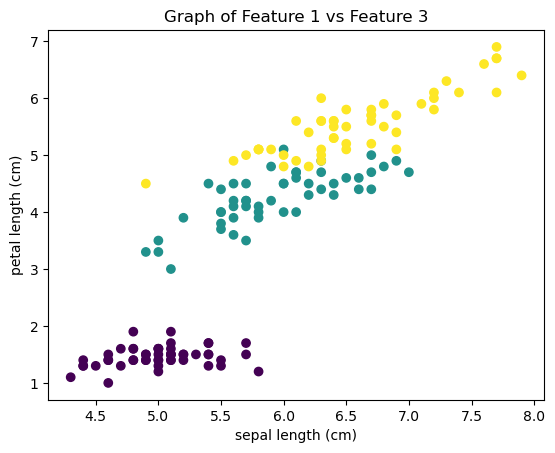

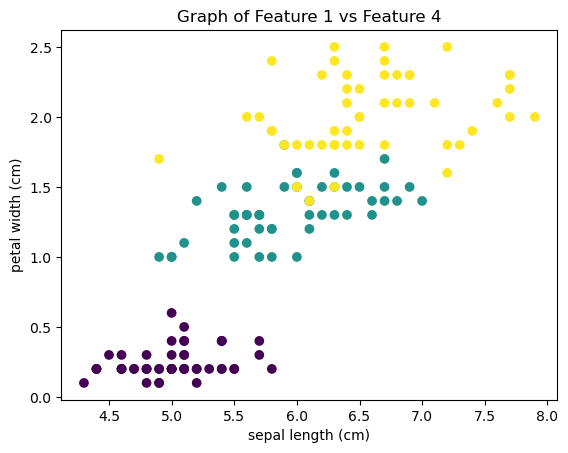

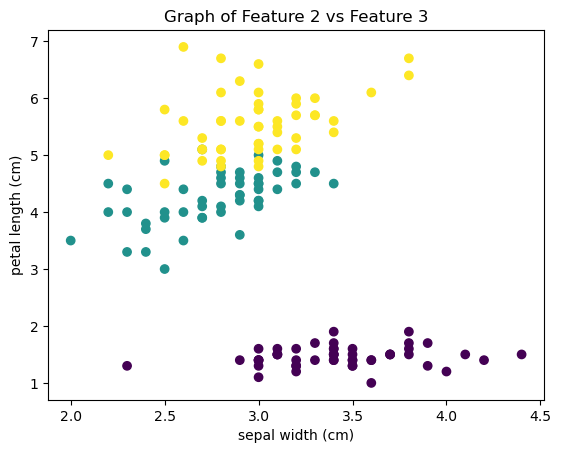

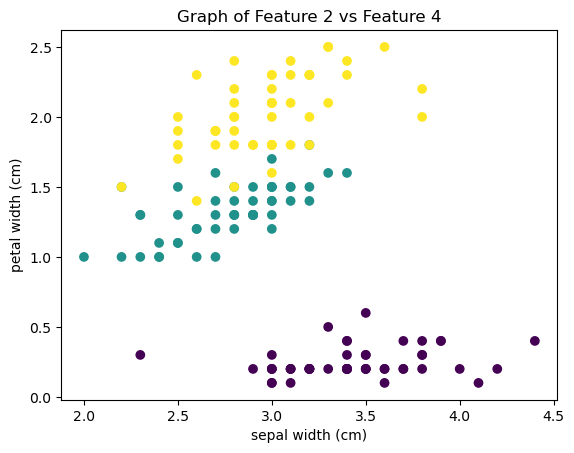

Text(0.5, 1.0, 'Graph of Feature 3 vs Feature 4')

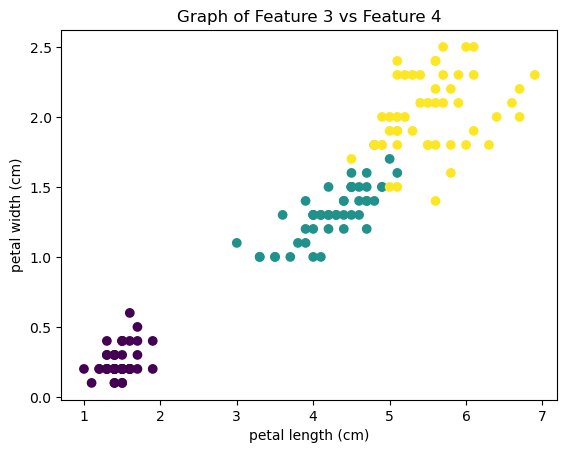

In [14]:
plot_pair(X[:,0], X[:,1], feature_names[0], feature_names[1], Y)
plt.title("Graph of Feature 1 vs Feature 2")
# plt.show()

plot_pair(X[:,0], X[:,2], feature_names[0], feature_names[2], Y)
plt.title("Graph of Feature 1 vs Feature 3")
# plt.show()

plot_pair(X[:,0], X[:,3], feature_names[0], feature_names[3], Y)
plt.title("Graph of Feature 1 vs Feature 4")
# plt.show()

plot_pair(X[:,1], X[:,2], feature_names[1], feature_names[2], Y)
plt.title("Graph of Feature 2 vs Feature 3")
# plt.show()

plot_pair(X[:,1], X[:,3], feature_names[1], feature_names[3], Y)
plt.title("Graph of Feature 2 vs Feature 4")
# plt.show()

plot_pair(X[:,2], X[:,3], feature_names[2], feature_names[3], Y)
plt.title("Graph of Feature 3 vs Feature 4")
# plt.show()



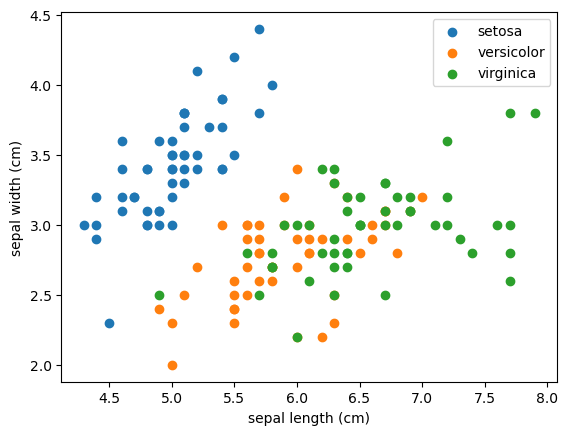

In [15]:
# Write a function that plots the graph AND adds a legend
# def plot_pair_with_legend(Horizontal_axis_data, Vertical_axis_data, Horizontal_axis_label , Vertical_axis_label, Answers):
def plot_pair_with_legend(x1, x2, x1_label , x2_label, Y):
    plt.figure() # Each time the function is called, it creates a new, separate plot. # New to function
    
    # for ... in loop where each iteration we extract two values i (the index) and target_name (the answer) 
    # ... looping over all 3 target names (answers)
    for i, target_name in enumerate(iris.target_names):
        # Graph the scatter plot. 
        # Eg. if i == 0: plt.scatter(Feature_1_if_setosa, Feature_1_if_setosa, corresponds_to_legend_setosa)
        plt.scatter(x1[Y == i], x2[Y == i], label=target_name) # Adding the 
        # break
    
    plt.xlabel(x1_label) 
    plt.ylabel(x2_label) 
    plt.legend() # Create a legend based on the Answers # New to function
    plt.show()

plot_pair_with_legend(X[:,0], X[:,1], feature_names[0], feature_names[1], Y)

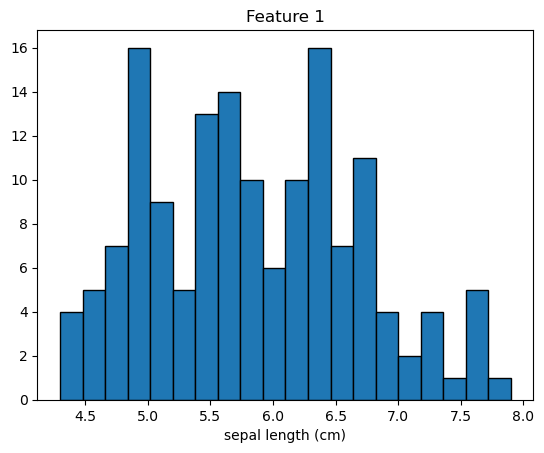

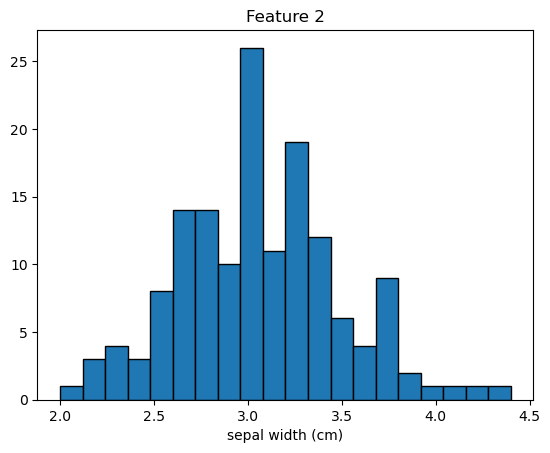

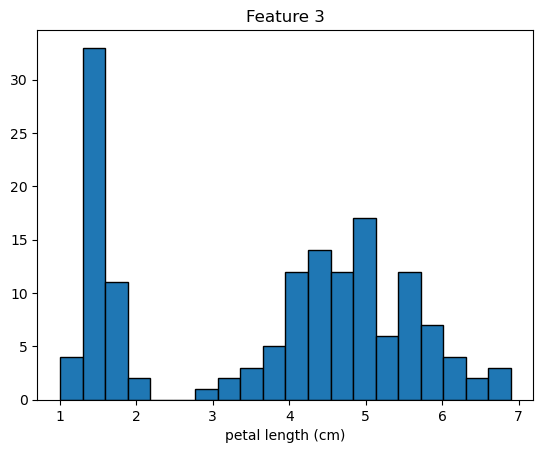

In [16]:
# Plot the histogram of each feature
plt.figure()
plt.hist(X[:,0], bins=20, edgecolor='black')
plt.title("Feature 1")
plt.xlabel(iris.feature_names[0])
plt.show()

plt.figure()
plt.hist(X[:,1], bins=20, edgecolor='black')
plt.title("Feature 2")
plt.xlabel(iris.feature_names[1])
plt.show()

plt.figure()
plt.hist(X[:,2], bins=20, edgecolor='black')
plt.title("Feature 3")
plt.xlabel(iris.feature_names[2])
plt.show()


In [17]:
# Shortest (Straight-line) distance between two points
# Also called the Euclidean distance
# Note: This is not python syntax, just math:

# Use Pythagorean formula: C = sqrt(A^2 + B^2) 

# 2D Pythagorean formula: C = sqrt((P1 - P2)^2 + (Q2- Q1)^2) 

P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
print(distance)


4.242640687119285


In [18]:
# 3D Pythagorean formula: C = sqrt((P1 - P2)^2 + (Q2- Q1)^2 + (R2- R1)^2) 
# Define two points in 3D space
P = np.array([1, 2, 3])
Q = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P - Q)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


In [19]:
# Put it in a function to make it reusable
def straight_line_distance(P, Q):
    return np.sqrt(np.sum((P - Q)**2))

In [20]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [21]:
#Take one sample from test set and find the distance between this sample and all samples in the training set. 
# In addition to the distance, you need to store the index of the sample in the training set. 

# So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).
test_instance = X_test[0]

distances = [(i, straight_line_distance(test_instance, train_instance)) for i, train_instance in enumerate(X_train)]
print(distances)

[(0, 0.8124038404635955), (1, 1.438749456993816), (2, 1.0535653752852738), (3, 3.3674916480965473), (4, 1.8601075237738276), (5, 0.9746794344808963), (6, 3.6537651812890224), (7, 3.823610858861032), (8, 1.1575836902790226), (9, 0.8602325267042631), (10, 3.5735136770411273), (11, 1.2999999999999998), (12, 3.5791060336346563), (13, 3.4161381705077445), (14, 0.754983443527075), (15, 1.997498435543818), (16, 1.7349351572897476), (17, 0.5830951894845297), (18, 0.9433981132056598), (19, 2.4020824298928627), (20, 0.9746794344808962), (21, 3.845776904605882), (22, 4.177319714841085), (23, 0.741619848709566), (24, 1.8493242008906932), (25, 3.685105154537656), (26, 3.6318039594669758), (27, 3.9357337308308855), (28, 0.5099019513592785), (29, 1.6278820596099706), (30, 3.782856063875548), (31, 1.407124727947029), (32, 1.9157244060668017), (33, 3.8314488121336034), (34, 0.22360679774997896), (35, 0.5099019513592788), (36, 0.6164414002968978), (37, 1.0049875621120894), (38, 1.3490737563232043), (39,

In [22]:
# Put it in a function to make it reusable
def calculate_distances(test_instance, X_train):
    distances = [(i, straight_line_distance(test_instance, train_instance)) for i, train_instance in enumerate(X_train)]
    return distances  

In [23]:
# Sort the (index, distance) tuples based on distance value in anascending order.
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

[(34, 0.22360679774997896),
 (45, 0.30000000000000027),
 (28, 0.5099019513592785),
 (35, 0.5099019513592788),
 (66, 0.5196152422706639),
 (47, 0.5291502622129183),
 (17, 0.5830951894845297),
 (36, 0.6164414002968978),
 (65, 0.6244997998398398),
 (41, 0.6480740698407859),
 (48, 0.6999999999999995),
 (70, 0.7071067811865478),
 (63, 0.728010988928052),
 (23, 0.741619848709566),
 (14, 0.754983443527075),
 (68, 0.774596669241483),
 (73, 0.7874007874011811),
 (0, 0.8124038404635955),
 (50, 0.8124038404635965),
 (9, 0.8602325267042631),
 (60, 0.9273618495495711),
 (18, 0.9433981132056598),
 (67, 0.9643650760992956),
 (20, 0.9746794344808962),
 (5, 0.9746794344808963),
 (37, 1.0049875621120894),
 (42, 1.0440306508910553),
 (2, 1.0535653752852738),
 (64, 1.0954451150103324),
 (62, 1.1045361017187258),
 (8, 1.1575836902790226),
 (44, 1.224744871391589),
 (43, 1.296148139681572),
 (11, 1.2999999999999998),
 (71, 1.3490737563232036),
 (38, 1.3490737563232043),
 (31, 1.407124727947029),
 (40, 1.424

In [24]:
# Top 5 closest Neighbors
k = 5
print(distances[:k])

[(34, 0.22360679774997896), (45, 0.30000000000000027), (28, 0.5099019513592785), (35, 0.5099019513592788), (66, 0.5196152422706639)]


In [25]:
#distances[:k]:

# distances is an array of tuples, where each pair consists of two values: 
# an index and a distance.
# The [:] slices the first k number of elements from the distances list i.e. the top k closest neighbors based on distance
# List comprehension:

# [index for index, distance in distances[:k]] is a list comprehension.
# It iterates over the first k elements in distances[:k], extracting the index from each pair (while ignoring the distance).
# This creates a new list neighbor_index that consists of the indices of the k nearest neighbors.
neighbor_index = [index for index, distance in distances[:k]]
print(neighbor_index)

[34, 45, 28, 35, 66]


In [26]:
# Extract the labels of the closest 5 neighbors
neighbor_label = []
neighbor_label = y_train[neighbor_index]
print(neighbor_label)

[1 1 1 1 1]


In [27]:
# Put it in a function to make it reusable
def find_neighbors(test_instance, X_train, y_train, k):
    distances = calculate_distances(test_instance, X_train)
    distances.sort(key=lambda x: x[1])
    neighbor_index = [index for index, distance in distances[:k]]
    neighbor_label = y_train[neighbor_index]
    return neighbor_label

In [28]:
# Which answer has the most labels in the top 5?
def vote_on_labels(neighbor_label):
    prediction_dict = {}
    for x in neighbor_label:
        if x in prediction_dict:
            prediction_dict[x] += 1
        else:
            prediction_dict[x] = 1
    prediction = max(prediction_dict, key=prediction_dict.get)
    return prediction

In [29]:
y_pred = vote_on_labels(neighbor_label)
y_pred

1

In [30]:
#solution
def KNN(X_train, y_train, X_test, k):
    y_pred = []
    for instance in X_test:
        neighbor_label = find_neighbors(instance, X_train, y_train, k)
        prediction = vote_on_labels(neighbor_label)
        y_pred.append(prediction)
    return y_pred

In [31]:
y_test == y_pred

array([ True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True])

In [32]:
accuracy = sum(y_test == y_pred) / len(y_test)
print(f"accuracy: {accuracy * 100} %")

accuracy: 30.666666666666664 %


In [43]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])


y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

X_train.reshape(-1)

array([ 1,  8,  3, 10,  5,  4,  7])